<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>


In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

// needed to generate the Table of contents 
// taken from github.com/kmahelona/ipython_notebook_goodies

<IPython.core.display.Javascript object>

In [2]:
#To work with Atom and Jupyter at the same time

%load_ext autoreload
%autoreload 2

# Data Warngling
## Data Collection
See Importing data.ipynb

## Data Organization
All data files are stored in the Data folder. The raw file has been downloaded in the data/raw/ folder.

## Data Definition


In [3]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec #gridspec allows me to make a subplot with different aspect ratio
from IPython.display import Image #used to display images saved to disk

In [4]:
os.chdir('..')
print(os.getcwd())

/home/andrea/Dropbox/PyProjects/Predictive_Maintenance_Fanjet


In [5]:
filename = 'train.csv' 
#try also 'data/test.csv' and 'data/RUL.csv' for similar results
file_path = 'data/'+filename
df = pd.read_csv(file_path)

In [6]:
df.head(5)

,unit_number,cycle_time,op_setting_1,op_setting_2,op_setting_3,s1,s2,s3,s4,s5,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,dataset
0,1,1,-0.0005,0.0004,100.0,518.67,642.36,1583.23,1396.84,14.62,...,2388.01,8145.32,8.4246,0.03,391,2388,100.0,39.11,23.3537,FD003
1,1,2,0.0008,-0.0003,100.0,518.67,642.50,1584.69,1396.89,14.62,...,2388.03,8152.85,8.4403,0.03,392,2388,100.0,38.99,23.4491,FD003
2,1,3,-0.0014,-0.0002,100.0,518.67,642.18,1582.35,1405.61,14.62,...,2388.00,8150.17,8.3901,0.03,391,2388,100.0,38.85,23.3669,FD003
3,1,4,-0.0020,0.0001,100.0,518.67,642.92,1585.61,1392.27,14.62,...,2388.08,8146.56,8.3878,0.03,392,2388,100.0,38.96,23.2951,FD003
4,1,5,0.0016,0.0000,100.0,518.67,641.68,1588.63,1397.65,14.62,...,2388.03,8147.80,8.3869,0.03,392,2388,100.0,39.14,23.4583,FD003


In [7]:
df.dtypes

unit_number       int64
cycle_time        int64
op_setting_1    float64
op_setting_2    float64
op_setting_3    float64
s1              float64
s2              float64
s3              float64
s4              float64
s5              float64
s6              float64
s7              float64
s8              float64
s9              float64
s10             float64
s11             float64
s12             float64
s13             float64
s14             float64
s15             float64
s16             float64
s17               int64
s18               int64
s19             float64
s20             float64
s21             float64
dataset          object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160359 entries, 0 to 160358
Data columns (total 27 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   unit_number   160359 non-null  int64  
 1   cycle_time    160359 non-null  int64  
 2   op_setting_1  160359 non-null  float64
 3   op_setting_2  160359 non-null  float64
 4   op_setting_3  160359 non-null  float64
 5   s1            160359 non-null  float64
 6   s2            160359 non-null  float64
 7   s3            160359 non-null  float64
 8   s4            160359 non-null  float64
 9   s5            160359 non-null  float64
 10  s6            160359 non-null  float64
 11  s7            160359 non-null  float64
 12  s8            160359 non-null  float64
 13  s9            160359 non-null  float64
 14  s10           160359 non-null  float64
 15  s11           160359 non-null  float64
 16  s12           160359 non-null  float64
 17  s13           160359 non-null  float64
 18  s14 

Dataset is very clean. There aren't any null values.

In [9]:
df.nunique()

unit_number       260
cycle_time        543
op_setting_1      670
op_setting_2      111
op_setting_3        2
s1                  6
s2               1799
s3              15377
s4              20582
s5                  6
s6                 56
s7               6311
s8               1163
s9              34161
s10                21
s11               771
s12              5982
s13               567
s14             20090
s15             13124
s16                 2
s17                58
s18                 6
s19                 2
s20               676
s21             26659
dataset             4
dtype: int64

In [10]:
df['op_setting_3'].value_counts()

100.0    143218
60.0      17141
Name: op_setting_3, dtype: int64

It looks like op_setting_3 is either 60 or 100 (probably a ercentage value).

In [11]:
df['dataset'].value_counts()

FD004    61249
FD002    53759
FD003    24720
FD001    20631
Name: dataset, dtype: int64

As we know dataset takes 4 values FD001, FD002, FD003, FD004

In [12]:
df['s19'].value_counts()

100.00    143218
84.93      17141
Name: s19, dtype: int64

Other columns with few unique vlaues are not very meaningful

In [13]:
df.aggregate(['min', 'max']).T

,min,max
unit_number,1,260
cycle_time,1,543
op_setting_1,-0.0087,42.008
op_setting_2,-0.0006,0.842
op_setting_3,60,100
s1,445,518.67
s2,535.48,645.11
s3,1242.67,1616.91
s4,1023.77,1441.49
s5,3.91,14.62


In [14]:
df.describe()

,unit_number,cycle_time,op_setting_1,op_setting_2,op_setting_3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
count,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,...,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000
mean,105.553758,123.331338,17.211973,0.410004,95.724344,485.840890,597.361022,1467.035653,1260.956434,9.894999,...,338.789821,2349.645243,8088.950972,9.054747,0.025185,360.698801,2273.754039,98.389146,25.942709,15.565700
std,72.867325,83.538146,16.527988,0.367938,12.359044,30.420388,42.478516,118.175261,136.300073,4.265554,...,164.193480,111.167242,80.623257,0.751581,0.004997,31.021430,142.513114,4.656270,11.691422,7.015067
min,1.000000,1.000000,-0.008700,-0.000600,60.000000,445.000000,535.480000,1242.670000,1023.770000,3.910000,...,128.310000,2027.570000,7845.780000,8.156300,0.020000,302.000000,1915.000000,84.930000,10.160000,6.010500
25%,44.000000,57.000000,0.001300,0.000200,100.000000,449.440000,549.960000,1357.360000,1126.830000,5.480000,...,164.790000,2387.970000,8070.530000,8.439250,0.020000,332.000000,2212.000000,100.000000,14.330000,8.601300
50%,89.000000,114.000000,19.998100,0.620000,100.000000,489.050000,605.930000,1492.810000,1271.740000,9.350000,...,321.690000,2388.070000,8118.590000,9.030100,0.030000,367.000000,2319.000000,100.000000,24.920000,14.953500
75%,164.000000,173.000000,35.001500,0.840000,100.000000,518.670000,642.340000,1586.590000,1402.200000,14.620000,...,521.340000,2388.160000,8139.410000,9.344200,0.030000,392.000000,2388.000000,100.000000,38.820000,23.294600
max,260.000000,543.000000,42.008000,0.842000,100.000000,518.670000,645.110000,1616.910000,1441.490000,14.620000,...,537.490000,2390.490000,8293.720000,11.066900,0.030000,400.000000,2388.000000,100.000000,39.890000,23.950500


## Data Cleaning

As we saw there are no missing values in this dataset.

In [15]:
duplicateRowsDF = df[df.duplicated()]
duplicateRowsDF

,unit_number,cycle_time,op_setting_1,op_setting_2,op_setting_3,s1,s2,s3,s4,s5,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,dataset


There are also no duplicate rows. This is expected. 

### Outlier Check

Plotting Boxplots for each variable and each time-series will be too time consuming and generate too many plots. We can use a more succint method by calculating the IQR-score for each variable in each time-series, to weed out the timeseries which show no outliers. If a Time-Series has a datapoint smaller or larger than 1.5 the IQR range we will plot a boxplot and scatter plot to investigate.

```
# might be useful later
# iterate over unique datasets and unit_numbers. isolating a single timeseries

for dataset in df["dataset"].unique() :
    for unit_number in  df[(df["dataset"] == dataset)]['unit_number'].unique() :
        time_series = df[(df["dataset"] == dataset) & (df["unit_number"] == unit_number)]
```

In [16]:
#time_series = df[(df["dataset"] == 'FD001') & (df["unit_number"] == 5)]
#print(type(time_series))
#print(time_series.describe())

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR


In [18]:
from tqdm.notebook import tqdm

sns.set() #setting default Seaborn plot style


Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

for ((col_name, lower_val),(col_name, upper_val)) in tqdm(zip(lower.items(),upper.items()), total=len(lower)):
    #print(lower_val,upper_val)
    outliers = (df[col_name] < lower_val)|(df[col_name] > upper_val)
    if(sum(outliers)>0) :
        #print(col_name, lower_val)
        #print(time_series[col_name])
        _ = plt.figure(figsize=(15,5))
        gs = gridspec.GridSpec(1, 2, width_ratios=[1, 6]) 
        ax0 = plt.subplot(gs[0])
        ax0 = plt.title('Outliers Check')
        ax0 = sns.boxplot(x=col_name, data=df, orient='v',notch=True, width=0.1, flierprops = dict(marker='*', markerfacecolor='red', markersize=10))
        dump, dump2, ymin, ymax = plt.axis()
        ax1 = plt.subplot(gs[1])
        ax1 = plt.title('Outliers Check')
        ax1 = plt.scatter(df['cycle_time'], df[col_name],c=outliers, cmap=plt.cm.bwr, alpha=0.5, s=5)
        ax1 = plt.xlabel('Time Cycle')
        xmin, xmax, dump, dump2 = plt.axis()
        plt.axis([xmin, xmax, ymin, ymax])
        #ax1 = plt.ylabel(col_name)
            
        plt.tight_layout()
        savefile = 'figures/outliers/'+filename[:-4]+'_outliers_'+col_name+'.png'
        plt.savefig(savefile)
        plt.close()

The outliers here identified seem to be simply extreme values of the data. There seem to be no outliers in this dataset that needs to be removed. A few examples are provided for clarification

#### *cycle_time* 
In this case, it looks like there are many outliers form the boxplot. But the scatter plot reveals that these are regular data point in a distribution heavily skewed towards lower values. 
Intuition: All cycles start at zero, few engine survives over 350 cycles.

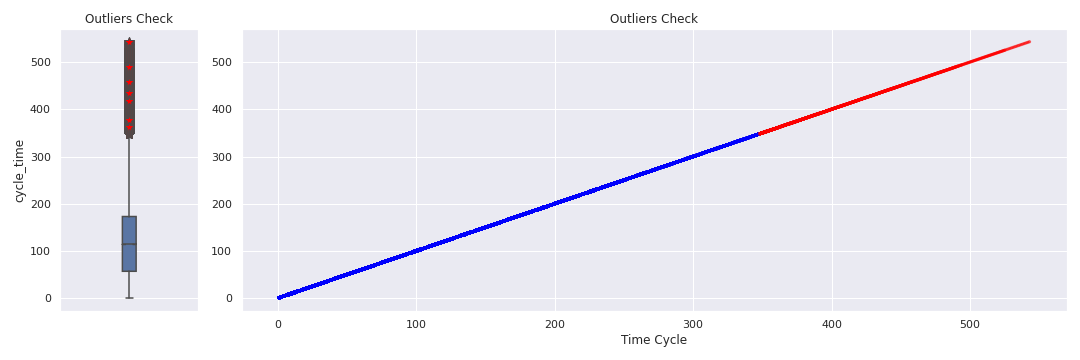

In [19]:

Image(filename='figures/outliers/train_outliers_cycle_time.png') 

#### *op_setting_3* 
It seem to take only 2 values: 100% and 60%. Given the high quantity of values at 60% we cannot rule them outliers and exclude them from the data set.

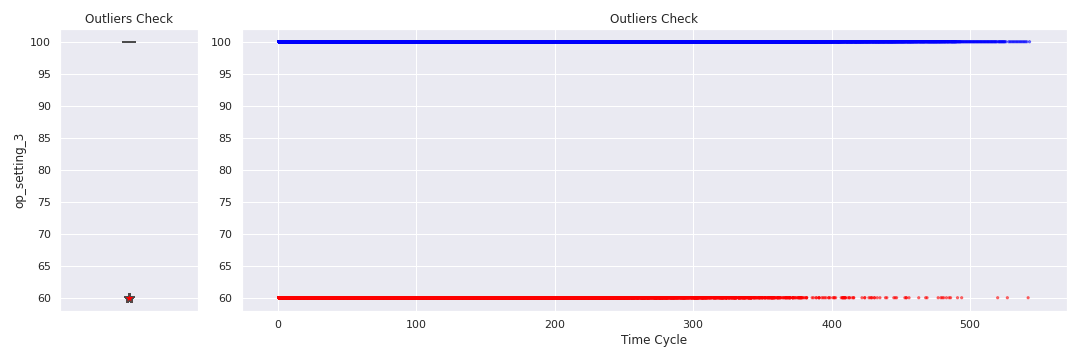

In [20]:
Image(filename='figures/outliers/train_outliers_op_setting_3.png') 

#### *s14* 
The outliers identified here look like normal datapoint, extreme when compared to the IQR of the distribution.

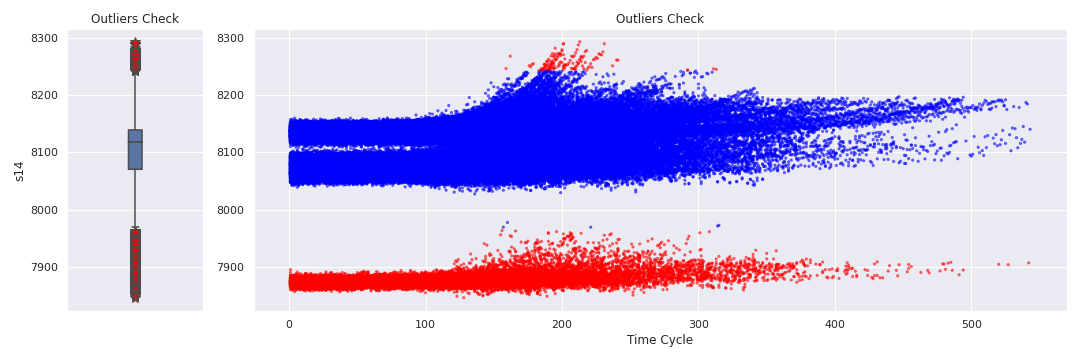

In [21]:
Image(filename='figures/outliers/train_outliers_s14.png') 


## Conclusions

No changes to the data set are needed. It's ready to be analyzed.

(The same analysis has been done on train.csv, test.csv. The same conclusion was reached
While RUL.csv has a number of duplicate rows, they should not be removed.)
